<a href="https://colab.research.google.com/github/RufinoMartin/DataScience2021/blob/main/Indices_Comoddities_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook reune Indices Mundiales de Commodities, extraidos de una base de datos en formato xlsx. del Fondo Monetario Internacional, al cual puede accederse con el enlace abajo:

https://docs.google.com/spreadsheets/d/1pJewns-8gIg4QdaNZDFHK8MyVGx6KDKn/edit#gid=321170148


La finalidad de este notebook es proveer variable/s para producir principalmente analisis uni y bivariados.
Posteriormente formará parte del dataframe final. 

In [1]:
# Importacion Librerias

import pandas as pd
import pandas_profiling
from functools import reduce
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter




Realizamos la importancion directa de un CSV resultante de una wrangling del archivo del FMI. 

Para acceder al notebook de adquisicion y wrangling: 

https://github.com/RufinoMartin/DataScience2021/blob/main/Comoddities.ipynb

De no funcionar el import de abajo, dirigirse a 

https://github.com/RufinoMartin/DataScience2021/blob/main/Commodities.csv

Apretar "Raw", copiar y pegar ese URL en pd.read_csv(' '). 

In [2]:
#Importamos dataset.

df_comms = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Commodities.csv?token=GHSAT0AAAAAABRYGSF2XAACVLFRIM6KJ2B2YRXMEEA')
df_comms.head(5)

,Unnamed: 0,Año,Promedio,Alimentos,Industrial,Agro,Metales,Energia
0,0,01/2019,117.078244,100.466542,118.836909,103.536150,114.711385,133.302098
1,1,02/2019,119.011525,98.772205,125.808562,103.608780,120.811052,136.048817
2,2,03/2019,119.910036,98.063110,127.539176,105.409046,121.105733,138.256367
3,3,04/2019,123.416731,101.569201,129.656529,104.681017,121.924057,143.768294
4,4,05/2019,120.477541,98.094289,129.330578,105.436360,121.161561,139.410557


In [3]:
df_comms.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df_comms.shape

(37, 7)

In [5]:
#Aprovechamos para modificar el nombre de 'Año' a 'Fecha', para empalmar con otros dataframe mas adelante.

df_comms.rename(columns={'Año':'Fecha'}, inplace=True)

In [6]:
df_comms.dtypes

Fecha          object
Promedio      float64
Alimentos     float64
Industrial    float64
Agro          float64
Metales       float64
Energia       float64
dtype: object

In [7]:
# Mejoramos la apariencia y usabilidad de la columna Fecha.

In [8]:
# Es necesario pasar la columna a tipo string primero, ya que es el tipo de datos que admite la funcion DateTime. 

df_comms['DateTime'] = pd.to_datetime(df_comms['Fecha'].astype(str), format='%m/%Y')
df_comms.head(3)

,Fecha,Promedio,Alimentos,Industrial,Agro,Metales,Energia,DateTime
0,01/2019,117.078244,100.466542,118.836909,103.536150,114.711385,133.302098,2019-01-01
1,02/2019,119.011525,98.772205,125.808562,103.608780,120.811052,136.048817,2019-02-01
2,03/2019,119.910036,98.063110,127.539176,105.409046,121.105733,138.256367,2019-03-01


In [9]:
# Nos quedamos solo con DateTime.

df_comms.drop(columns={'Fecha'}, inplace=True)

In [10]:
# Reordenamos 

Tituloscolumnas = ['DateTime','Alimentos','Industrial','Agro','Metales','Energia','Promedio']
df_comms = df_comms.reindex(columns=Tituloscolumnas)

In [ ]:
df_comms.head(5)

,DateTime,Alimentos,Industrial,Agro,Metales,Energia,Promedio
0,2019-01-01,100.466542,118.836909,103.536150,114.711385,133.302098,117.078244
1,2019-02-01,98.772205,125.808562,103.608780,120.811052,136.048817,119.011525
2,2019-03-01,98.063110,127.539176,105.409046,121.105733,138.256367,119.910036
3,2019-04-01,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731
4,2019-05-01,98.094289,129.330578,105.436360,121.161561,139.410557,120.477541


In [11]:
#Renombramos todo

df_Indices_Commodities = df_comms

In [13]:
#Guardamos cambios 

df_Indices_Commodities.to_csv('Indices_Commodities.csv')

In [ ]:
df_comms.info

<bound method DataFrame.info of      DateTime   Alimentos  Industrial        Agro     Metales     Energia  \
0  2019-01-01  100.466542  118.836909  103.536150  114.711385  133.302098   
1  2019-02-01   98.772205  125.808562  103.608780  120.811052  136.048817   
2  2019-03-01   98.063110  127.539176  105.409046  121.105733  138.256367   
3  2019-04-01  101.569201  129.656529  104.681017  121.924057  143.768294   
4  2019-05-01   98.094289  129.330578  105.436360  121.161561  139.410557   
5  2019-06-01  100.212841  130.989096  104.958595  125.339086  123.532319   
6  2019-07-01  100.271974  134.433558  101.490499  130.726497  126.889777   
7  2019-08-01   98.260430  123.198447   97.621066  126.910558  118.180128   
8  2019-09-01   96.053058  124.101686   97.359429  128.684621  123.742531   
9  2019-10-01   96.382200  121.736305   95.920179  126.835339  120.505405   
10 2019-11-01  100.277643  119.009952   99.185988  123.452512  129.104171   
11 2019-12-01  104.019084  122.086372   99.1

ANALISIS UNIVARIADO

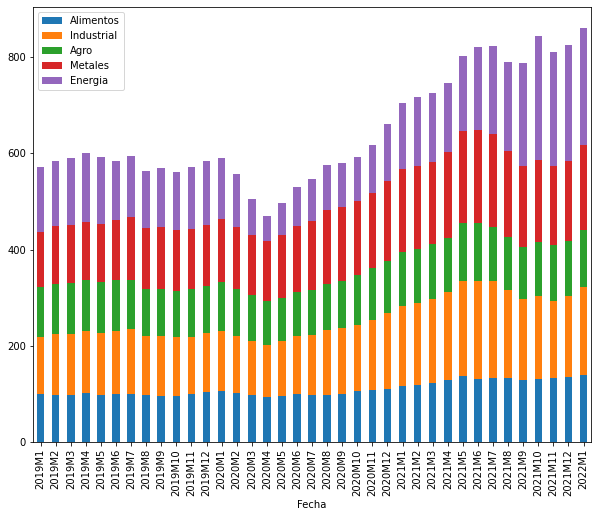

In [ ]:
#Comencemos con un grafico de barras acumulado:
#  Toma el indice (representante del tiempo) como ejeX, y excluimos al promedio del ejeY.

df_comms.plot.bar(x='Fecha', y=['Alimentos', 'Industrial', 'Agro', 'Metales', 'Energia'] , stacked=True, figsize=(10,8))

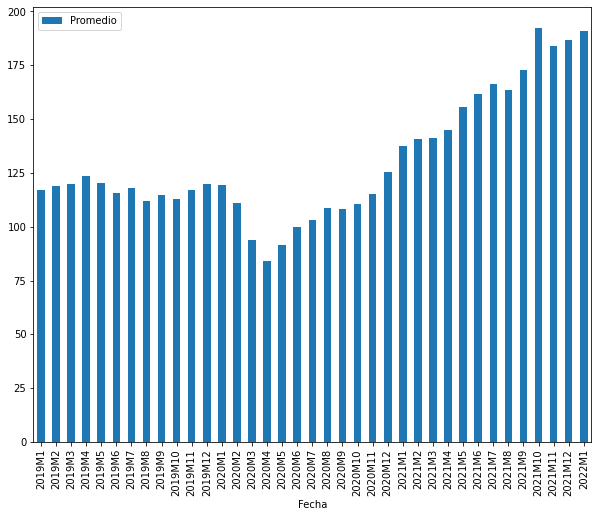

In [ ]:
# Otro solo para el promedio

df_comms.plot.bar(x='Fecha', y='Promedio', figsize=(10,8))

In [ ]:
#Seleccionamos el ultimo mes disponible para realizar una visualizacion

df_2022M1 = (df_comms.loc[[36]])
df_2022M1.drop(columns=['Promedio','Fecha'], inplace=True)    #Dejamos solo las variables a comparar
df_2022 = df_2022M1.transpose()                             # Invertimos filas y columnas para facilitar la visualizacion
df_2022

,36
Alimentos,139.821403
Industrial,182.846230
Agro,117.708599
Metales,177.855471
Energia,242.756336


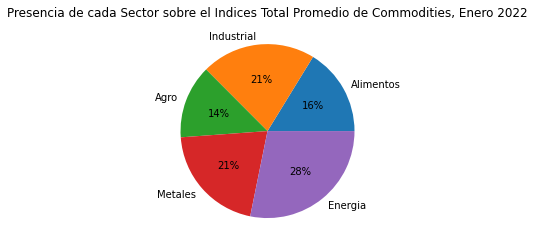

In [ ]:
# Hagamos un grafico de torta para visualizar cuanto ocupa cada sector dentro del promedio para el ultimo año


x = (df_2022[36])
labels = ['Alimentos', 'Industrial', 'Agro', 'Metales', 'Energia']

fig, ax = plt.subplots()
ax.pie(x, labels = labels,autopct='%.0f%%', radius=1)

ax.set_title('Presencia de cada Sector sobre el Indices Total Promedio de Commodities, Enero 2022')
plt.show()